# MNIST CNN

We first normalize the pixel values and reshape the input data into 4D tensors for use with a CNN.

Then, we define a simple CNN model with two convolutional layers and two max pooling layers, followed by two dense layers.

The model is compiled, trained, and evaluated on the test set, and we make predictions on a random test image.

In [1]:
# Import the libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Normalize pixel values to between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [42]:
# Reshape the images to 4D tensors for use with a CNN
x_train = x_train.reshape((-1, 28, 28, 1))
x_test = x_test.reshape((-1, 28, 28, 1))

In [43]:
# Define the CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [44]:
# Compile the model
model.compile(optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [45]:
# Train the model
model.fit(x_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 35s 18ms/step - loss: 0.1405 - accuracy: 0.9578
Epoch 2/15
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0488 - accuracy: 0.9849
Epoch 3/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0333 - accuracy: 0.9895
Epoch 4/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0251 - accuracy: 0.9922
Epoch 5/15
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0194 - accuracy: 0.9936
Epoch 6/15
1875/1875 [==============================] - 27s 15ms/step - loss: 0.0153 - accuracy: 0.9949
Epoch 7/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0105 - accuracy: 0.9969
Epoch 8/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0106 - accuracy: 0.9965
Epoch 9/15
1875/1875 [==============================] - 28s 15ms/step - loss: 0.0075 - accuracy: 0.9975
Epoch 10/15
1875/1875 [==============================] - 28s 15m

In [46]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.0650 - accuracy: 0.9869
Test accuracy: 0.9868999719619751


In [47]:
# Make predictions on the test set
predictions = model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


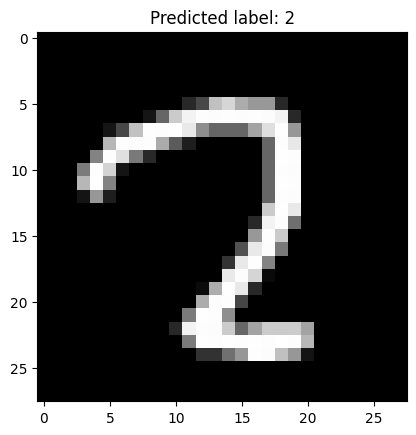

In [48]:
# Plot a random image and its predicted label
index = np.random.randint(len(x_test))
plt.imshow(x_test[index].reshape(28,28), cmap='gray')
plt.title(f"Predicted label: {np.argmax(predictions[index])}")
plt.show()